In [1]:
#import Numpy
import os
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

In [2]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data/secondData")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r/code
Main directory is /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r
data dir is /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r/data/secondData


In [3]:
#define the input file
#input_filename = os.path.join(data_dir,"PSRJ2021_cmap.fits")
input_filename = os.path.join(data_dir,"PSRJ2021_3deg_100mev_gti.fits")

#First, you can open the file and check the information in it
fits_info = fits.open(input_filename)

#...like the number of HDU, in this case 5
fits_info.info()

Filename: /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r/data/secondData/PSRJ2021_3deg_100mev_gti.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    226   26232R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   1753R x 2C   [D, D]   


In [4]:
#We will look at the EVENTS table (HDU=1)
table_header = fits_info[1].header
table_data = fits_info[1].data
table_data.columns

ColDefs(
    name = 'ENERGY'; format = 'E'; unit = 'MeV'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'L'; format = 'E'; unit = 'deg'
    name = 'B'; format = 'E'; unit = 'deg'
    name = 'THETA'; format = 'E'; unit = 'deg'
    name = 'PHI'; format = 'E'; unit = 'deg'
    name = 'ZENITH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'EARTH_AZIMUTH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'EVENT_ID'; format = 'J'
    name = 'RUN_ID'; format = 'J'
    name = 'RECON_VERSION'; format = 'I'
    name = 'CALIB_VERSION'; format = '3I'
    name = 'EVENT_CLASS'; format = '32X'
    name = 'EVENT_TYPE'; format = '32X'
    name = 'CONVERSION_TYPE'; format = 'I'
    name = 'LIVETIME'; format = 'D'; unit = 's'
    name = 'DIFRSP0'; format = 'E'
    name = 'DIFRSP1'; format = 'E'
    name = 'DIFRSP2'; format = 'E'
    name = 'DIFRSP3'; format = 'E'
    name = 'DIFRSP4'; format = 'E'
)

In [5]:
#Now we convert the data to a Astropy Table object
from astropy.table import Table

evt_data = Table(table_data)
print("Data contains %d events" % len(evt_data))

Data contains 26232 events


In [6]:
evt_data

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
1483.4395,302.3351,38.08736,74.95465,2.7358353,30.14574,250.96269,62.33644,7.782152,243667821.61519086,9861480,243663173,0,0 .. 0,False .. True,False .. False,1,53.24988570809364,0.0,0.0,0.0,0.0,0.0
711.07776,302.8759,38.973904,75.929726,2.8639202,30.09626,19.380842,62.540516,317.8381,243668785.6520992,11821245,243663173,0,0 .. 0,False .. True,False .. True,0,33.18728172779083,0.0,0.0,0.0,0.0,0.0
470.59518,302.57922,37.870136,74.87687,2.4562378,23.895866,346.79962,57.94011,326.18747,243691496.8691704,15497462,243686103,0,0 .. 0,False .. True,False .. True,0,82.47164613008499,0.0,0.0,0.0,0.0,0.0
488.2935,302.78595,38.73893,75.69438,2.794168,55.546215,216.14186,83.77583,42.52168,243730186.81259418,8182069,243725796,0,0 .. 0,False .. True,False .. False,1,104.30561146140099,0.0,0.0,0.0,0.0,0.0
256.87405,302.56714,37.925716,74.91833,2.4945052,33.26907,45.998642,63.48047,311.06244,243749254.96060506,620126,243748990,0,0 .. 0,False .. True,False .. False,1,261.9740666747093,0.0,0.0,0.0,0.0,0.0
143.05614,302.20813,37.846306,74.69753,2.6892807,37.244503,58.69942,66.58814,308.60095,243749361.839697,832924,243748990,0,0 .. 0,False .. True,False .. True,0,59.20995029807091,0.0,0.0,0.0,0.0,0.0
2089.9768,302.3022,38.47246,75.26458,2.966379,37.102985,59.73938,66.40093,308.83157,243772320.32147723,532961,243772042,0,0 .. 0,False .. True,False .. False,1,210.37761428952217,0.0,0.0,0.0,0.0,0.0
250.24657,302.23367,38.32874,75.11449,2.9336529,49.096275,221.24939,76.84497,35.238075,243776264.3074996,11986126,243772042,0,0 .. 0,False .. True,False .. True,0,33.83117026090622,0.0,0.0,0.0,0.0,0.0
2328.9194,301.81406,37.700268,74.40609,2.872629,43.319046,225.68748,71.39343,28.922562,243776406.81881806,12609407,243772042,0,0 .. 0,False .. True,False .. True,0,10.76753517985344,0.0,0.0,0.0,0.0,0.0


In [7]:
#define the range of energy of interest
evt_data_300 = evt_data[evt_data['ENERGY']>300] #E>300MeV
evt_data_1G = evt_data[evt_data['ENERGY']>1e3] #E>1GeV

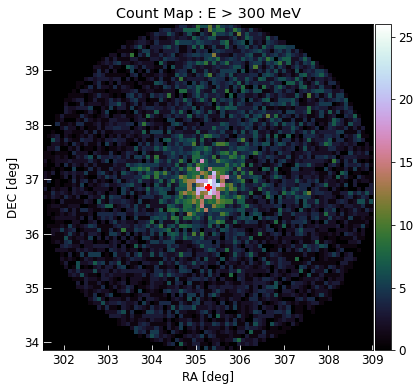

In [8]:
#count map
plt.rc('font',size=12)
plt.figure(figsize=(7,6))
plt.title("Count Map : E > 300 MeV")
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.tick_params('x', which='major', direction='in', length=5. , color = 'white')
plt.tick_params('y', which='major', direction='in', length=8. , color = 'white')
plt.tick_params('y', which='minor', direction='in', length=5., color = 'white')
plt.tick_params('x', which='minor', direction='in', length=2.5, color = 'white')
    

NBINS = (80,80)
plt.hist2d(evt_data_300['RA'], evt_data_300['DEC'], NBINS, cmap='cubehelix')
cbar = plt.colorbar(pad = 0.005)

#plot the position of PSR according catalogs
plt.plot(305.27275, 36.85133333,'rP')

#save figure in results directory
out_name = os.path.join(results_dir,"cmap300.png")
plt.savefig(out_name, dpi = 300)
plt.show()

(RA, DEC) = (305.27275, 36.85133333)
----------------------------------------------
Mean value RA = 305.278 \pm 2.183
Mean value DEC = 36.851 \pm 1.747
----------------------------------------------
----------------------------------------------
Bin value RA = 0.075
Bin value DEC = 0.060
----------------------------------------------
----------------------------------------------
Imagine center RA = 305.278
Imagine center DEC = 36.851
----------------------------------------------
----------------------------------------------
Mode (RA,DEC) = (304.690, 36.736)
Median (RA,DEC) = (305.369, 37.012)
Mean (RA,DEC) = (305.402, 37.049)
----------------------------------------------


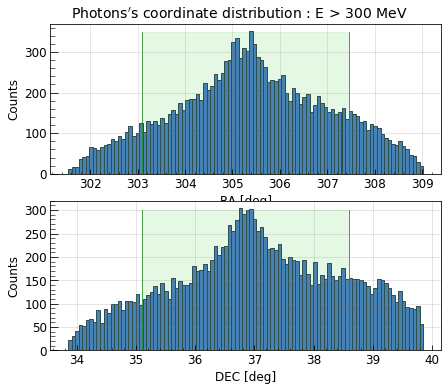

In [9]:
#photon's coordinate distribution 
#SUBPLOTS
fig, axs = plt.subplots(2,1 ,figsize=(7,6))
plt.rc('font', size=10)

#adjust space between plots
plt.subplots_adjust(wspace=0, hspace=0.18)

#Plots
histRA = axs[0].hist(evt_data_300['RA'],bins=100,facecolor = 'steelblue', edgecolor='darkslategray')
histDEC = axs[1].hist(evt_data_300['DEC'],bins=100,facecolor = 'steelblue', edgecolor='darkslategray')
#X label only on last one
axs[0].set_xlabel('RA [deg]')
axs[1].set_xlabel('DEC [deg]')

#Title
fig.suptitle('Photons$\'$s coordinate distribution : E > 300 MeV', y=0.92, fontsize=14)

#grids and other common properties
for ax in axs:
    ax.grid(b=True, color='grey', linestyle='-', alpha=0.25)
    ax.set_ylabel('Counts')
    ax.minorticks_on()
    ax.tick_params('x', which='major', direction='in', length=5.)
    ax.tick_params('y', which='major', direction='in', length=8.)
    ax.tick_params('y', which='minor', direction='in', length=5., left=True)
    ax.tick_params('x', which='minor', direction='in', length=2.5,bottom=True)
    

#-----------------------------------------STATISTIC-----------------------------------------
#mean and standard deviation
meanRA = np.mean(histRA[1])
stdRA = np.std(histRA[1])

meanDEC = np.mean(histDEC[1])
stdDEC = np.std(histDEC[1])

print('(RA, DEC) = (305.27275, 36.85133333)')
print('----------------------------------------------')
print('Mean value RA = %0.3f \pm %0.3f' % (meanRA,stdRA))
print('Mean value DEC = %0.3f \pm %0.3f' % (meanDEC,stdDEC))
print('----------------------------------------------')

#bin value
len_binRA = (max(evt_data_300['RA'])-min(evt_data_300['RA']))/100
len_binDEC = (max(evt_data_300['DEC'])-min(evt_data_300['DEC']))/100

print('----------------------------------------------')
print('Bin value RA = %0.3f' % (len_binRA))
print('Bin value DEC = %0.3f' % (len_binDEC))
print('----------------------------------------------')

#imagine center
centerRA = (max(evt_data_300['RA'])+min(evt_data_300['RA']))/2
centerDEC = (max(evt_data_300['DEC'])+min(evt_data_300['DEC']))/2

print('----------------------------------------------')
print('Imagine center RA = %0.3f' % (centerRA))
print('Imagine center DEC = %0.3f' % (centerDEC))
print('----------------------------------------------')

#statistic
import statistics
modeRA = statistics.mode(evt_data_300['RA'])
modeDEC = statistics.mode(evt_data_300['DEC'])

medianRA = statistics.median(evt_data_300['RA'])
medianDEC = statistics.median(evt_data_300['DEC'])

mean_RA = statistics.mean(evt_data_300['RA'])
mean_DEC = statistics.mean(evt_data_300['DEC'])

print('----------------------------------------------')
print('Mode (RA,DEC) = (%0.3f, %0.3f)' % (modeRA,modeDEC))
print('Median (RA,DEC) = (%0.3f, %0.3f)' % (medianRA,medianDEC))
print('Mean (RA,DEC) = (%0.3f, %0.3f)' % (mean_RA,mean_DEC))
print('----------------------------------------------')


#plot 
axs[0].fill_between((meanRA-stdRA,meanRA+stdRA), 0, 350, alpha=0.13, color = 'LimeGreen')
axs[0].plot([meanRA-stdRA,meanRA-stdRA],[0,350], linestyle='-', linewidth='0.8', color = 'ForestGreen')
axs[0].plot([meanRA+stdRA,meanRA+stdRA],[0,350], linestyle='-', linewidth='0.8', color = 'ForestGreen')

axs[1].fill_between((meanDEC-stdDEC,meanDEC+stdDEC), 0, 300, alpha=0.13, color = 'LimeGreen')
axs[1].plot([meanDEC-stdDEC,meanDEC-stdDEC],[0,300], linestyle='-', linewidth='0.8', color = 'ForestGreen')
axs[1].plot([meanDEC+stdDEC,meanDEC+stdDEC],[0,300], linestyle='-', linewidth='0.8', color = 'ForestGreen')

#save figure in results directory
out_name = os.path.join(results_dir,"coord_distribution.png")
plt.savefig(out_name, dpi = 300)
plt.show()

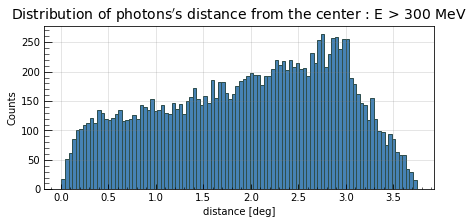

In [136]:
#study the number of photons in function of the distance from the center of the image
#it should be something like the PSF. So you can see how the PSF change in function of the energy

#distance from the ccenter of the image
d = np.sqrt((evt_data_300['RA']-centerRA)**2+(evt_data_300['DEC']-centerDEC)**2)

plt.figure(figsize=(7,3))
plt.rc('font', size=10)


#Plots
histD = plt.hist(d,bins=100,facecolor = 'steelblue', edgecolor='darkslategray')

#X, Y label
plt.xlabel('distance [deg]')
plt.ylabel('Counts')

#Title
plt.title('Distribution of photons$\'$s distance from the center : E > 300 MeV', fontsize=14)

#grids and other common properties
plt.grid(b=True, color='grey', linestyle='-', alpha=0.25)
plt.minorticks_on()
plt.tick_params('x', which='major', direction='in', length=5.)
plt.tick_params('y', which='major', direction='in', length=8.)
plt.tick_params('y', which='minor', direction='in', length=5., left=True)
plt.tick_params('x', which='minor', direction='in', length=2.5,bottom=True)

#save figure in results directory
out_name = os.path.join(results_dir,"d300_distribution.png")
plt.savefig(out_name, dpi = 300)
plt.show()

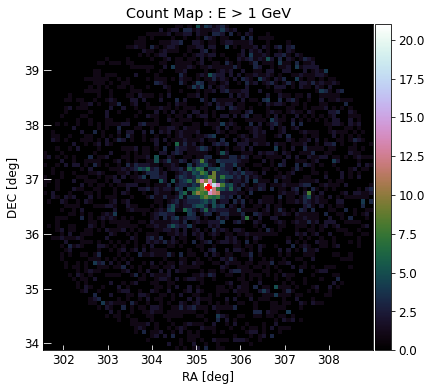

In [154]:
#count map
plt.rc('font',size=12)
plt.figure(figsize=(7,6))
plt.title("Count Map : E > 1 GeV")
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.tick_params('x', which='major', direction='in', length=5. , color = 'white')
plt.tick_params('y', which='major', direction='in', length=8. , color = 'white')
plt.tick_params('y', which='minor', direction='in', length=5., color = 'white')
plt.tick_params('x', which='minor', direction='in', length=2.5, color = 'white')


NBINS = (80,80)
plt.hist2d(evt_data_1G['RA'], evt_data_1G['DEC'], NBINS, cmap='cubehelix')
cbar = plt.colorbar(pad=0.005)

#plot the position of PSR according catalogs
plt.plot(305.27275, 36.85133333,'rP')

#save figure in results directory
out_name = os.path.join(results_dir,"cmap1G.png")
plt.savefig(out_name, dpi = 300)
plt.show()

(RA, DEC) = (305.27275, 36.85133333)
----------------------------------------------
Mean value RA = 305.271 \pm 2.174
Mean value DEC = 36.854 \pm 1.741
----------------------------------------------
----------------------------------------------
Bin value RA = 0.075
Bin value DEC = 0.060
----------------------------------------------
----------------------------------------------
Imagine center RA = 305.271
Imagine center DEC = 36.854
----------------------------------------------
----------------------------------------------
Mode (RA,DEC) = (302.800, 37.238)
Median (RA,DEC) = (305.331, 36.934)
Mean (RA,DEC) = (305.389, 37.003)
----------------------------------------------


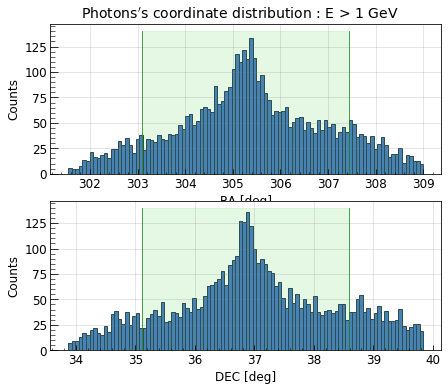

In [138]:
#photon's coordinate distribution 
#SUBPLOTS
fig, axs = plt.subplots(2,1 ,figsize=(7,6))
plt.rc('font', size=10)

#adjust space between plots
plt.subplots_adjust(wspace=0, hspace=0.18)

#Plots
histRA_1G = axs[0].hist(evt_data_1G['RA'],bins=100,facecolor = 'steelblue', edgecolor='darkslategray')
histDEC_1G = axs[1].hist(evt_data_1G['DEC'],bins=100,facecolor = 'steelblue', edgecolor='darkslategray')
#X label only on last one
axs[0].set_xlabel('RA [deg]')
axs[1].set_xlabel('DEC [deg]')

#Title
fig.suptitle('Photons$\'$s coordinate distribution : E > 1 GeV', y=0.92, fontsize=14)

#grids and other common properties
for ax in axs:
    ax.grid(b=True, color='grey', linestyle='-', alpha=0.25)
    ax.set_ylabel('Counts')
    ax.minorticks_on()
    ax.tick_params('x', which='major', direction='in', length=5.)
    ax.tick_params('y', which='major', direction='in', length=8.)
    ax.tick_params('y', which='minor', direction='in', length=5., left=True)
    ax.tick_params('x', which='minor', direction='in', length=2.5,bottom=True)
    

#-----------------------------------------STATISTIC-----------------------------------------
#mean and standard deviation
meanRA_1G = np.mean(histRA_1G[1])
stdRA_1G = np.std(histRA_1G[1])

meanDEC_1G = np.mean(histDEC_1G[1])
stdDEC_1G = np.std(histDEC_1G[1])

print('(RA, DEC) = (305.27275, 36.85133333)')
print('----------------------------------------------')
print('Mean value RA = %0.3f \pm %0.3f' % (meanRA_1G,stdRA_1G))
print('Mean value DEC = %0.3f \pm %0.3f' % (meanDEC_1G,stdDEC_1G))
print('----------------------------------------------')

#bin value
len_binRA_1G = (max(evt_data_1G['RA'])-min(evt_data_1G['RA']))/100
len_binDEC_1G = (max(evt_data_1G['DEC'])-min(evt_data_1G['DEC']))/100

print('----------------------------------------------')
print('Bin value RA = %0.3f' % (len_binRA_1G))
print('Bin value DEC = %0.3f' % (len_binDEC_1G))
print('----------------------------------------------')

#imagine center
centerRA_1G = (max(evt_data_1G['RA'])+min(evt_data_1G['RA']))/2
centerDEC_1G = (max(evt_data_1G['DEC'])+min(evt_data_1G['DEC']))/2

print('----------------------------------------------')
print('Imagine center RA = %0.3f' % (centerRA_1G))
print('Imagine center DEC = %0.3f' % (centerDEC_1G))
print('----------------------------------------------')

#statistic
import statistics
modeRA_1G = statistics.mode(evt_data_1G['RA'])
modeDEC_1G = statistics.mode(evt_data_1G['DEC'])

medianRA_1G = statistics.median(evt_data_1G['RA'])
medianDEC_1G = statistics.median(evt_data_1G['DEC'])

mean_RA_1G = statistics.mean(evt_data_1G['RA'])
mean_DEC_1G = statistics.mean(evt_data_1G['DEC'])

print('----------------------------------------------')
print('Mode (RA,DEC) = (%0.3f, %0.3f)' % (modeRA_1G,modeDEC_1G))
print('Median (RA,DEC) = (%0.3f, %0.3f)' % (medianRA_1G,medianDEC_1G))
print('Mean (RA,DEC) = (%0.3f, %0.3f)' % (mean_RA_1G,mean_DEC_1G))
print('----------------------------------------------')


#plot 
axs[0].fill_between((meanRA_1G-stdRA_1G,meanRA_1G+stdRA_1G), 0, 140, alpha=0.13, color = 'LimeGreen')
axs[0].plot([meanRA_1G-stdRA_1G,meanRA_1G-stdRA_1G],[0,140], linestyle='-', linewidth='0.8', color = 'ForestGreen')
axs[0].plot([meanRA_1G+stdRA_1G,meanRA_1G+stdRA_1G],[0,140], linestyle='-', linewidth='0.8', color = 'ForestGreen')

axs[1].fill_between((meanDEC_1G-stdDEC_1G,meanDEC_1G+stdDEC_1G), 0, 140, alpha=0.13, color = 'LimeGreen')
axs[1].plot([meanDEC_1G-stdDEC_1G,meanDEC_1G-stdDEC_1G],[0,140], linestyle='-', linewidth='0.8', color = 'ForestGreen')
axs[1].plot([meanDEC_1G+stdDEC_1G,meanDEC_1G+stdDEC_1G],[0,140], linestyle='-', linewidth='0.8', color = 'ForestGreen')

#save figure in results directory
out_name = os.path.join(results_dir,"coord_distribution1G.png")
plt.savefig(out_name, dpi = 300)
plt.show()

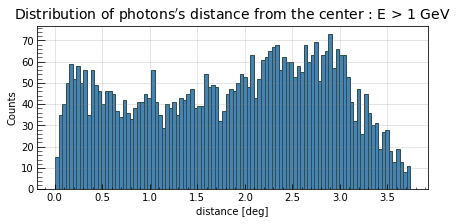

In [139]:
#study the number of photons in function of the distance from the center of the image
#it should be something like the PSF. So you can see how the PSF change in function of the energy

#distance from the ccenter of the image
d_1G = np.sqrt((evt_data_1G['RA']-centerRA)**2+(evt_data_1G['DEC']-centerDEC)**2)

plt.figure(figsize=(7,3))
plt.rc('font', size=10)


#Plots
histD_1G = plt.hist(d_1G,bins=100,facecolor = 'steelblue', edgecolor='darkslategray')

#X label only on last one
plt.xlabel('distance [deg]')
plt.ylabel('Counts')

#Title
plt.title('Distribution of photons$\'$s distance from the center : E > 1 GeV', fontsize=14)

#grids and other common properties
plt.grid(b=True, color='grey', linestyle='-', alpha=0.25)
plt.minorticks_on()
plt.tick_params('x', which='major', direction='in', length=5.)
plt.tick_params('y', which='major', direction='in', length=8.)
plt.tick_params('y', which='minor', direction='in', length=5., left=True)
plt.tick_params('x', which='minor', direction='in', length=2.5,bottom=True)

#save figure in results directory
out_name = os.path.join(results_dir,"d1G_distribution.png")
plt.savefig(out_name, dpi = 300)
plt.show()